# Atelier 01
--

In [1]:
##Pandas, Numpy, Matplotlib
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = ps.read_csv('Iris.csv')
data= data1[['SepalLengthCm','SepalWidthCm']]
data= data1.iloc[:,1:5]

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
#data.shape
data.shape[0]

150

In [6]:
def centre_data(data):
    g=data.mean()  ### g=np.mean(data)
    return(data-g)

In [7]:
### test 
X_c = centre_data(data)

In [8]:
X_c

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [9]:
#Définir votre propre covariance matrix
def cor_cov_pr(X):
  return (1/X.shape[0])*np.dot(X.T,X)

In [10]:
print(cor_cov_pr(X_c))

[[ 0.68112222 -0.03900667  1.26519111  0.51345778]
 [-0.03900667  0.18675067 -0.319568   -0.11719467]
 [ 1.26519111 -0.319568    3.09242489  1.28774489]
 [ 0.51345778 -0.11719467  1.28774489  0.57853156]]


In [11]:
# Réduire les données
et=X_c.std()

In [12]:
X_cr=X_c/et 
print(X_cr)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        -0.897674      1.028611      -1.336794     -1.308593
1        -1.139200     -0.124540      -1.336794     -1.308593
2        -1.380727      0.336720      -1.393470     -1.308593
3        -1.501490      0.106090      -1.280118     -1.308593
4        -1.018437      1.259242      -1.336794     -1.308593
..             ...           ...            ...           ...
145       1.034539     -0.124540       0.816888      1.443121
146       0.551486     -1.277692       0.703536      0.918985
147       0.793012     -0.124540       0.816888      1.050019
148       0.430722      0.797981       0.930239      1.443121
149       0.068433     -0.124540       0.760212      0.787951

[150 rows x 4 columns]


In [14]:
cor3=data.corr()
print(cor3)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


### Analyser le R et interpreter 
- R est la matrice de corrélation
- Les variable les plus corrélées sont 
  - les variables X3 et X4
  - les variables X1 et X3
  - les variables X1 et X4


- X1(sepal.lenght), X3(petal.lenght) et X4(petal.width) sont fortement corrélées -> On peut générer une droite de dimension 1 pour les représenter
- X2(sepal.width) est faiblement corrélée avec les autres variables
- X1(sepal.lenght), X3(petal.lenght) et X4(petal.width) sont linéairement dépendantes

# ACP 

Trouver les valeurs propres et les vecteurs propres de la matrice de corrélation corr3
- Les valeurs propres sont les valeurs de la diagonale de la matrice de corrélation
- Les vecteurs propres sont les vecteurs de la matrice de corrélation

In [15]:
from numpy.linalg import eig
[Lambda,A]=eig(cor3)
print(Lambda)

[2.91081808 0.92122093 0.14735328 0.02060771]


In [16]:
#Somme des valeurs propres = 4 <=> 4 dimensions
print(sum(Lambda))

3.9999999999999982


In [17]:
# Vecteur engendré par la matrice de corrélation
print(A)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


On calcule le pourcentage d'inertie

In [18]:
def pour_inertie(Lambda):
    L=[]
    for i in range(Lambda.shape[0]):
        L.append(Lambda[i]/sum(Lambda)*100)
    return np.array(L)

# Pourcentage d'inertie
print(pour_inertie(Lambda))

[72.77045209 23.03052327  3.68383196  0.51519268]


In [19]:
# Les 2 premiers vecteurs propres sont les plus importants (environ 95% d'inertie)
sum(pour_inertie(Lambda)[0:2]) 

95.80097536148197

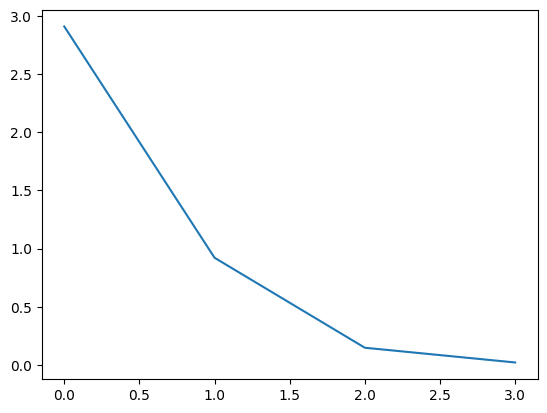

In [20]:
# Visualisation des valeurs propres
plt.plot(Lambda)

In [24]:
# Projection des données sur les 2 premiers axes
# Retrouver les coordonnées des points sur les nouveaux axes
Y =  np.dot(data,A[0:2].T)
Y.shape

(150, 2)

Covariance des nouvelles variable doivent tendre vers 0
Y1 et Y2 sont indépendantes

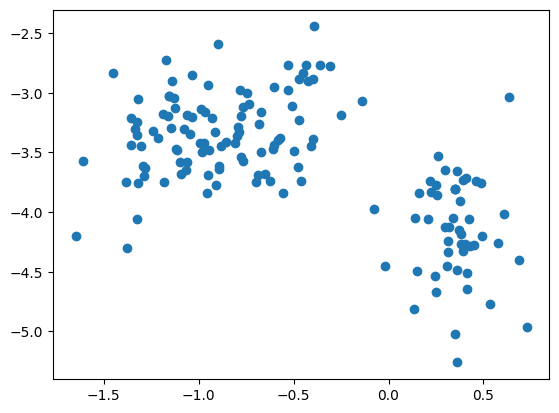

In [25]:
# La représentation des données sur les 2 premiers axes est plus facile à visualiserù
plt.plot(Y[:,0],Y[:,1],"*")
plt.scatter(Y[:,0],Y[:,1]) 

`Interpreprétation` : On peut déjà voir qu'il y a 2 groupement